# Final Project
Uncovering Insights on the Video Game Industry: A Data Analysis of Sales from 1980 to 2020
### Summary: 
This project analyzed a dataset containing sales information for video games in North America and Europe from 1980 to 2020. The analysis provided an overview of the video game market, including information on the top-selling platforms, genres, publishers, and revenue. The project used various data manipulation and visualization techniques to gain valuable insights into the video game market

On the offset of this project I downloaded the libraries required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read as a DataFrame in Pandas

In [2]:
vgsales_df = pd.read_csv(r'C:\Users\Perfect\Downloads\archive\vgsales.csv')

In [3]:
vgsales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
vgsales_df['Year'] = pd.to_numeric(vgsales_df['Year'], downcast='integer', errors='coerce')
vgsales_df.dropna(subset=['Year'], inplace=True)
vgsales_df['Year'] = pd.to_datetime(vgsales_df['Year'], format='%Y')

In [5]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16327 non-null  int64         
 1   Name          16327 non-null  object        
 2   Platform      16327 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16327 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16327 non-null  float64       
 7   EU_Sales      16327 non-null  float64       
 8   JP_Sales      16327 non-null  float64       
 9   Other_Sales   16327 non-null  float64       
 10  Global_Sales  16327 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


As we can see there are a bunch of blank values in the data in the 'Year' and 'Platform' field

In [6]:
vgsales_df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [7]:
vgsales_df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
vgsales_df.shape

(16327, 11)

We'll replace the blanks with 'unknown values' in both fields

In [9]:
vgsales_df.fillna("Unknown",inplace=True)

In [10]:
vgsales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Apart from the blank values the data looks clean

## Now lets begin EDA Process

## Top ten Platform

In [11]:
sales_by_platform = vgsales_df.groupby('Platform')['Global_Sales'].sum().to_frame()

In [12]:
sales_by_platform_top_10 = sales_by_platform.sort_values('Global_Sales', ascending=False).reset_index().head(10)
sales_by_platform_top_10

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.61
2,PS3,949.35
3,Wii,909.81
4,DS,818.96
5,PS,727.39
6,GBA,313.56
7,PSP,291.71
8,PS4,278.10
9,PC,255.05


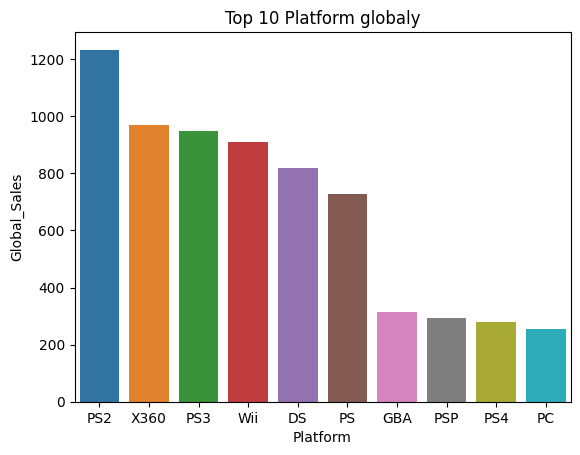

In [13]:
sns.barplot(x='Platform', y='Global_Sales', data=sales_by_platform_top_10);
plt.title('Top 10 Platform globaly');


As you can see the console games are far more revenue generator then PC.

## Percentage of genre in total sales

In [14]:
genre_ttl = vgsales_df.groupby('Genre')[['Global_Sales']].sum().sort_values('Global_Sales',ascending=False).reset_index()
genre_ttl['genre_prctge_ttl'] = genre_ttl['Global_Sales'] / genre_ttl['Global_Sales'].sum()*100


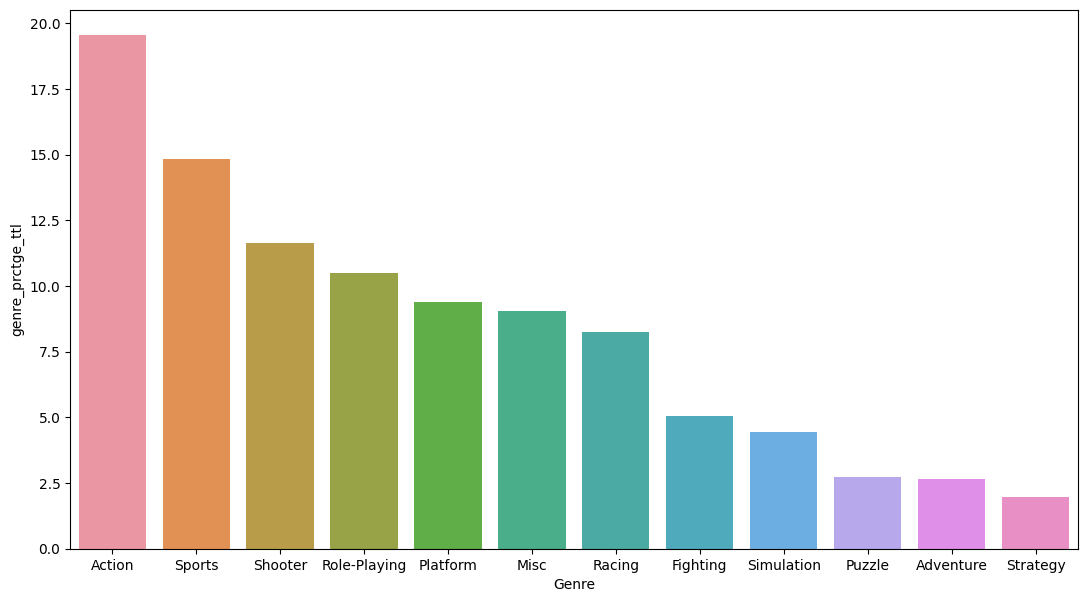

In [15]:
plt.figure(figsize=(13,7))
sns.barplot(x='Genre', y='genre_prctge_ttl', data=genre_ttl);

Action followed by sports and shooter are to three performer by sales

## Publisher with the most number of top-selling games

In [16]:
top_seller= vgsales_df[['Global_Sales','Publisher']].sort_values('Global_Sales',ascending=False).head(50)
top_selling_Publishers=top_seller.groupby('Publisher').count().sort_values('Global_Sales',ascending=False)

In [17]:

top_selling_Publishers.reset_index(inplace=True)


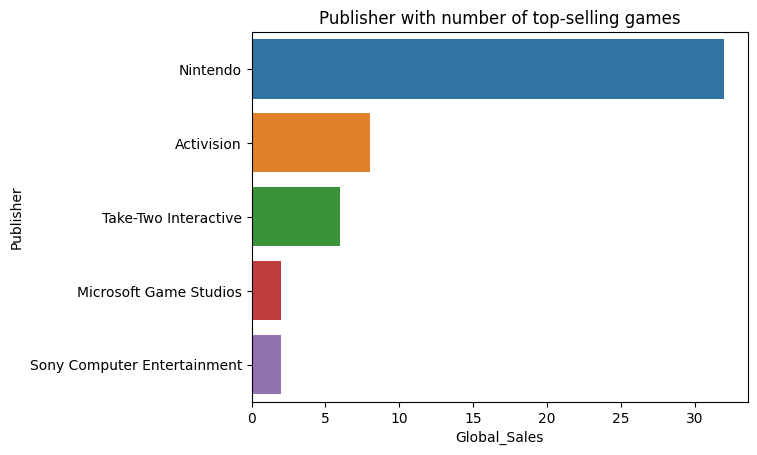

In [18]:
plt.title('Publisher with number of top-selling games')
sns.barplot(x='Global_Sales',y='Publisher',data=top_selling_Publishers);

## Average revenue per game by platform

In [19]:
avg_rev = vgsales_df.groupby('Platform')[['Global_Sales']].mean()
avg_rev.reset_index(inplace=True)
avg_rev.sort_values(by='Global_Sales',ascending=False,inplace=True)

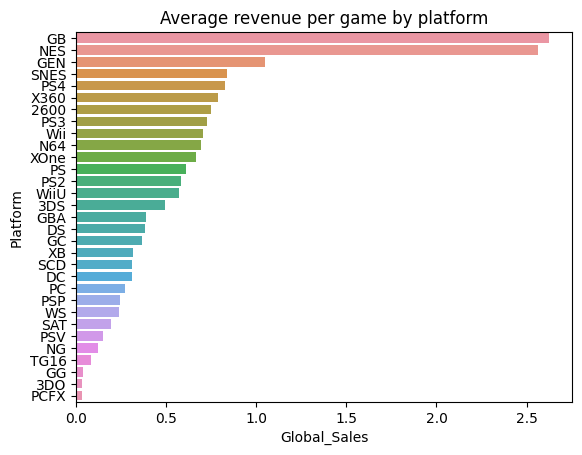

In [20]:
plt.title('Average revenue per game by platform')
sns.barplot(x='Global_Sales',y='Platform',data=avg_rev);

GB and  NES are clear winner folowd by GEN which is less then half of the GB and NES

# Question & Answers

### Q1 What are the  top 5 average sales per publisher?

In [21]:
avg_sal_pub = vgsales_df.groupby('Publisher')[['Global_Sales']].mean().head(5)
avg_sal_pub.sort_values('Global_Sales')
avg_sal_pub.reset_index(inplace=True)
avg_sal_pub

,Publisher,Global_Sales
0,10TACLE Studios,0.036667
1,1C Company,0.033333
2,20th Century Fox Video Games,0.388000
3,2D Boy,0.040000
4,3DO,0.281111


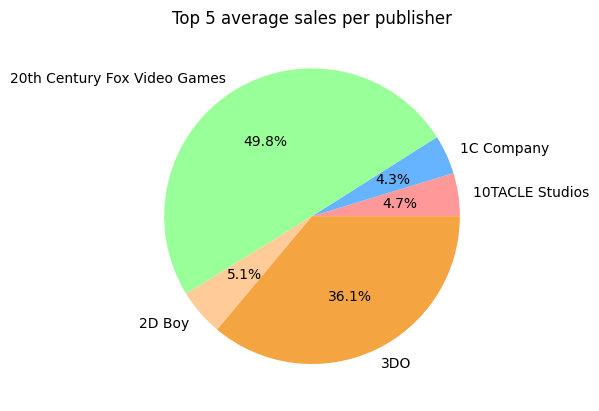

In [22]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#f5a442']
plt.title('Top 5 average sales per publisher')
plt.pie(avg_sal_pub.Global_Sales, labels=avg_sal_pub.Publisher, autopct='%.1f%%',colors=colors)
plt.show()

 The autopct parameter is used to format the data labels as a string. You can specify the format of the data labels by passing a string that contains placeholders for the values to the autopct parameter. Also change the color of each segment of pie chart using 'colors' parameter. You can either pass a single color code or list of color codes to the 'colors' parameter

### Q 2 How does the length of a game's title relate to its sales?

In [23]:
vgsales_df['Lenght_of_Name'] = vgsales_df['Name'].str.len()

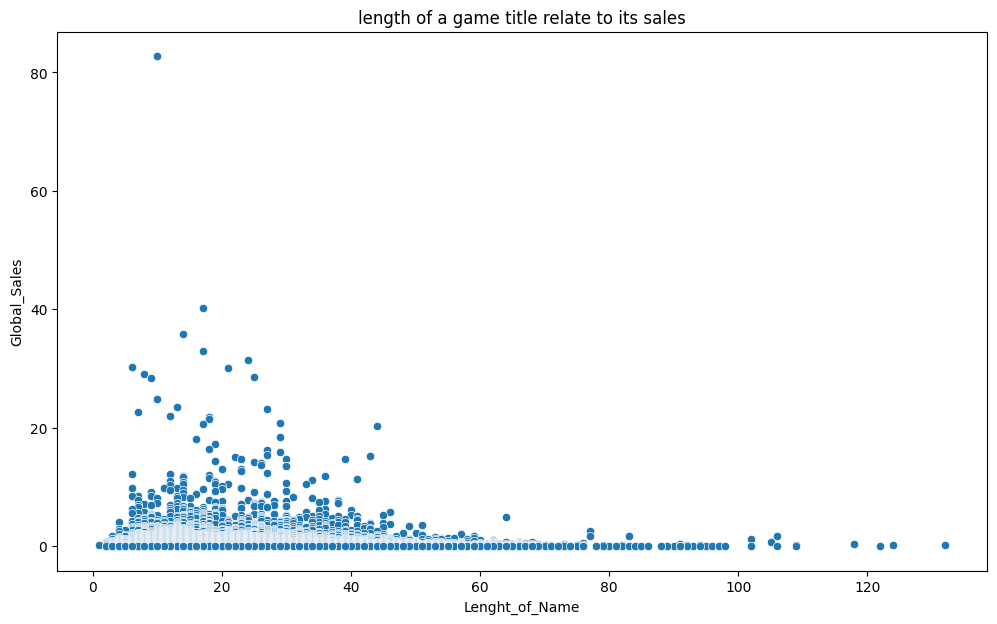

In [24]:
plt.figure(figsize=(12,7))
plt.title('length of a game title relate to its sales')
sns.scatterplot(x='Lenght_of_Name',y='Global_Sales',data=vgsales_df);

Their is some positive relation between title lenght sales

### Q3 Which genres have the highest average sales?

In [25]:
Genre_high_sales_avg = vgsales_df.groupby('Genre')[['Global_Sales']].mean().sort_values('Global_Sales')
Genre_high_sales_avg.drop('Platform',inplace=True)

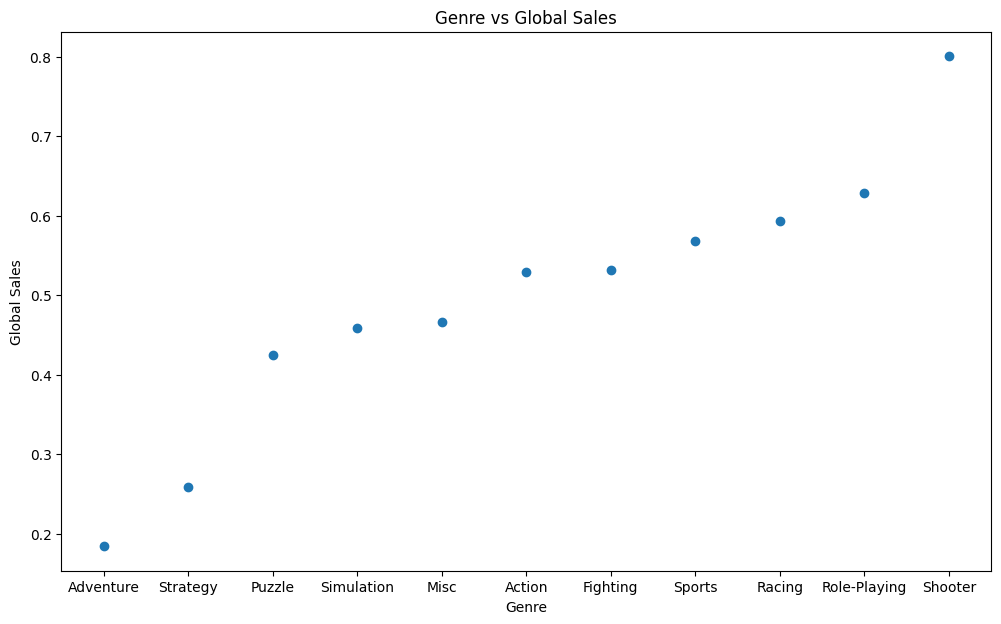

In [26]:
plt.figure(figsize=(12,7))
x = Genre_high_sales_avg.index
y = Genre_high_sales_avg['Global_Sales']
plt.scatter(x, y)
plt.grid(False)
plt.title("Genre vs Global Sales")
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.show()

##  Q4 What is the trend for sales in north America an EU ?

In [27]:
trend_region = vgsales_df.groupby('Year')[['NA_Sales','EU_Sales']].sum()

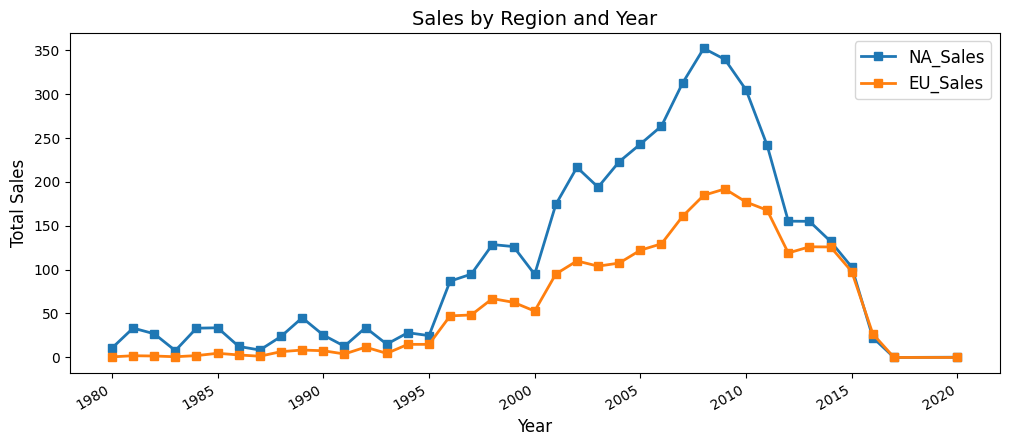

In [28]:
trend_region.plot(figsize=(12, 5), linewidth=2, fontsize=10,  marker='s')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Sales by Region and Year", fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Q5 what are Top ten titles?

In [29]:
Top_10_titles = vgsales_df[['Name','Global_Sales']].head(10)
Top_10_titles



,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


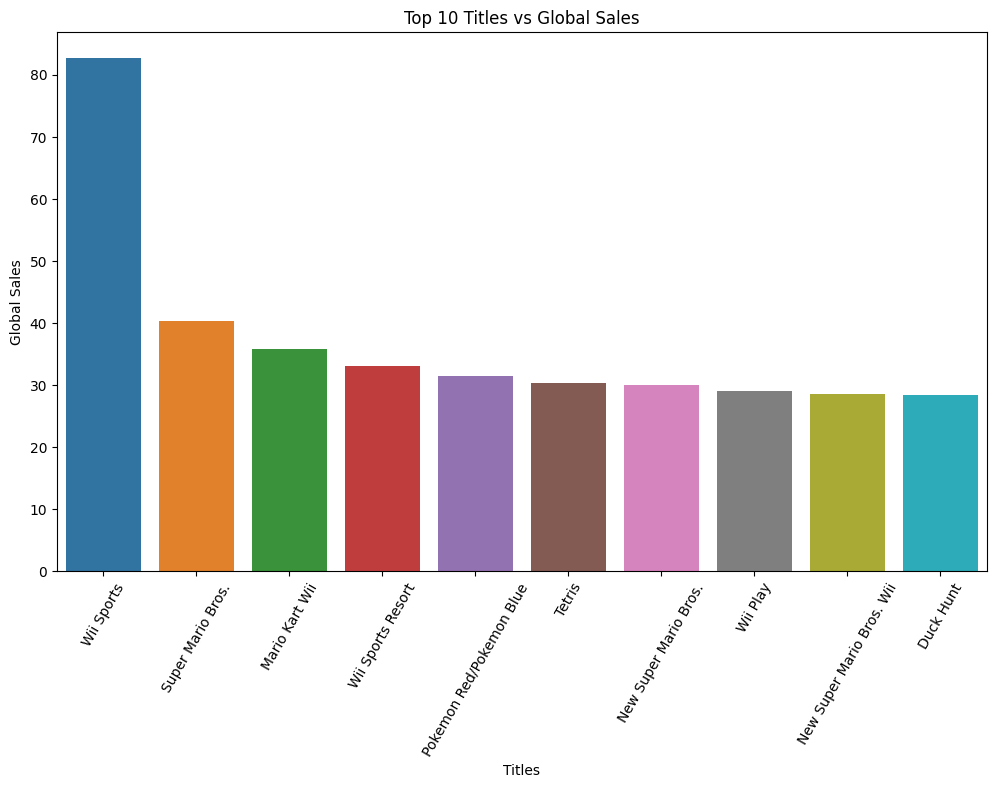

In [30]:
plt.figure(figsize=(12,7))
sns.barplot(x='Name', y='Global_Sales', data=Top_10_titles)
plt.xticks(rotation=60)
plt.title("Top 10 Titles vs Global Sales")
plt.xlabel("Titles")
plt.ylabel("Global Sales")
plt.show()

## Conclusion

In this project, we analyzed a dataset containing sales information for video games in North America and Europe from 1980 to 2020. We used various data manipulation and visualization techniques in order to gain valuable insights into the video game market.

We first performed data cleaning by replacing the missing values, after that, we found the top ten platforms by total sales, calculated the percentage of each genre in total sales, determined the publisher with the most number of top-selling games, calculated the average revenue per game by platform, identified the top 5 publishers by average sales per game, analyzed the relationship between the length of a game's title and its sales, identified the genres with the highest average sales and finally plotted the trend of sales in North America and the EU over time.

The analysis provided an overview of the video game market, including information on the top-selling platforms, genres, publishers, and revenue. This information can be used to make better-informed decisions on game production, sales, and marketing strategies.

### Recomendations

Based on our analysis, the following recommendations can be made for the video game industry:

1) Focus on popular platforms: From the analysis, it's clear that certain platforms, such as the PS4 and Xbox One, are more popular than others. It would be wise for companies to focus on developing games for these platforms in order to tap into the largest potential audience.

2) Consider the genre: The data shows that certain genres, such as action and sports, have higher global sales than others. Companies should consider these popular genres when developing new games.

3) Partner with successful publishers: The data also shows that certain publishers, such as Electronic Arts and Activision, have had a higher number of top-selling games. Companies should consider partnering with these successful publishers in order to increase the chances of their games becoming successful.

4) Explore ways to increase revenue per game: The analysis shows that some platforms have a higher average revenue per game than others. Companies should explore ways to increase revenue per game, such as implementing in-game purchases or microtransactions, in order to maximize profits.

5) Look at the trends over time: By looking at the trend of sales over the years it's clear that the industry is growing, and continuously changing. Companies should keep an eye on the market trend, and be prepared to adapt accordingly.

6) Invest in good game design: As we can see that the number of characters in the game title has a positive correlation to the sales, invest in making your game title as attractive as possible for the players.

7) Invest in marketing: Getting a game noticed can be just as important as developing it. Make sure your game is marketed well and consider promoting it through different channels.

By considering these recommendations, companies in the video game industry can increase their chances of success and capitalize on the opportunities presented by the market.



